## Statistics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# House prices dataset
house_prices = [150000, 180000, 200000, 220000, 240000, 1000000, 150000]

# Calculate measures of center
mean_price = np.mean(house_prices)
median_price = np.median(house_prices)
mode_price = stats.mode(house_prices, keepdims=True)

# Display results
print(f"Mean Price: ${mean_price:,.2f}")
print(f"Median Price: ${median_price:,.2f}")
print(f"Mode Price: ${mode_price.mode[0]:,.2f}, Count: {mode_price.count[0]}")

Mean Price: $305,714.29
Median Price: $200,000.00
Mode Price: $150,000.00, Count: 2


In [3]:
## A teacher wants to analyze the test scores of students in a class to understand their performance.
## The dataset contains the following scores (out of 100):
test_scores = [56, 65, 67, 70, 72, 75, 80, 82, 85, 90, 95, 100]

## Measures of varitaion

Mean --> 789.0833333333334
Median --> 769.5
Ranges --> 1684
Standard deviation (std) --> 425.1862255399261


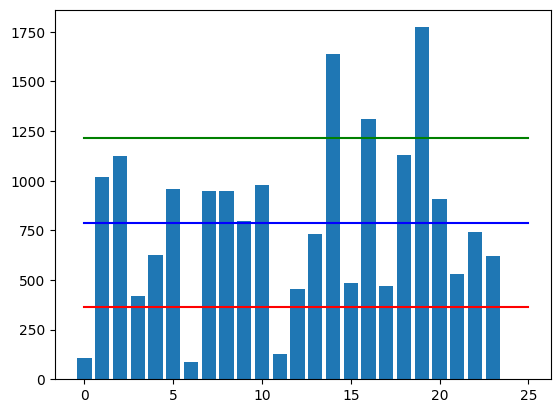

In [4]:
# We take a random sample of 24 of our friends on Facebook and wrote down how many friends that they had on Facebook.

friends = [109, 1017, 1127, 418, 625, 957, 89, 950, 946, 797, 981,
           125, 455, 731, 1640, 485, 1309, 472, 1132, 1773, 906, 531, 742, 621]

print("Mean -->",np.mean(friends))
print("Median -->",np.median(friends))

ranges = np.max(friends) - np.min(friends)
std = np.std(friends) # == 425.2

print("Ranges -->",ranges)
print("Standard deviation (std) -->",std)

import matplotlib.pyplot as plt
%matplotlib inline
y_pos = range(len(friends))
plt.bar(y_pos, friends)
plt.plot((0, 25), (789, 789), 'b-') # the center
plt.plot((0, 25), (789+425, 789+425), 'g-') # the mean plus the standard deviation
plt.plot((0, 25), (789-425, 789-425), 'r-') # the mean minus the standard deviation

# the data lives between the green and the red lines while the outliers live outside the lines.

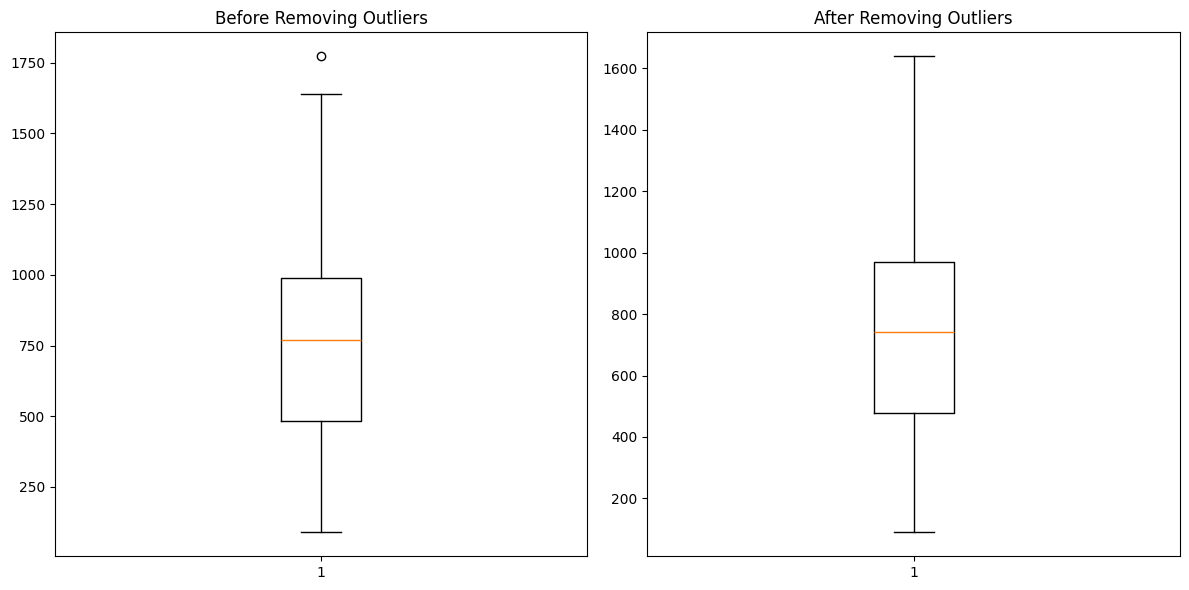

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
friends = [109, 1017, 1127, 418, 625, 957, 89, 950, 946, 797, 981, 
           125, 455, 731, 1640, 485, 1309, 472, 1132, 1773, 906, 531, 
           742, 621]

# Step 1: Calculate Q1, Q3, and IQR
Q1 = np.percentile(friends, 25)
Q3 = np.percentile(friends, 75)
IQR = Q3 - Q1

# Step 2: Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove outliers
filtered_friends = [x for x in friends if lower_bound <= x <= upper_bound]

# Plotting before and after removing outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Before removing outliers
ax1.boxplot(friends)
ax1.set_title("Before Removing Outliers")

# After removing outliers
ax2.boxplot(filtered_friends)
ax2.set_title("After Removing Outliers")

plt.tight_layout()
plt.show()

Mean --> 77.5
Median --> 79.5
Ranges --> 37
Standard deviation (std) --> 12.192210628101861


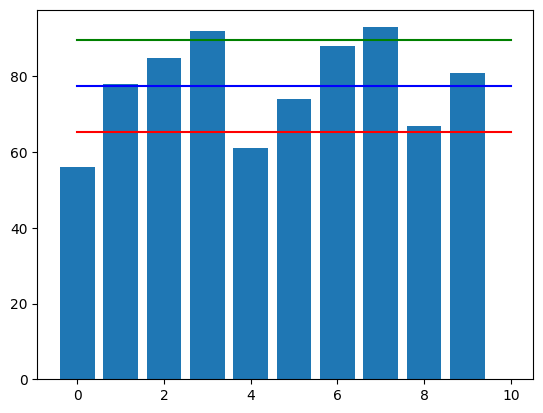

In [18]:
# Question
#Imagine a classroom of students has taken an exam, and their scores are as follows:
Scores=[56,78,85,92,61,74,88,93,67,81]

print("Mean -->",np.mean(Scores))
print("Median -->",np.median(Scores))

ranges = np.max(Scores) - np.min(Scores)
std = np.std(Scores) 

print("Ranges -->",ranges)
print("Standard deviation (std) -->",std)

import matplotlib.pyplot as plt
%matplotlib inline
y_pos = range(len(Scores))
plt.bar(y_pos, Scores)
plt.plot((0, 10), (np.mean(Scores),np.mean(Scores)), 'b-') # the center
plt.plot((0, 10), (np.mean(Scores)+np.std(Scores),np.mean(Scores)+np.std(Scores)), 'g-') # the mean plus the standard deviation
plt.plot((0,10 ), (np.mean(Scores)-np.std(Scores),np.mean(Scores)-np.std(Scores)), 'r-') # the mean minus the standard deviation

# the data lives between the green and the red lines while the outliers live outside the lines.

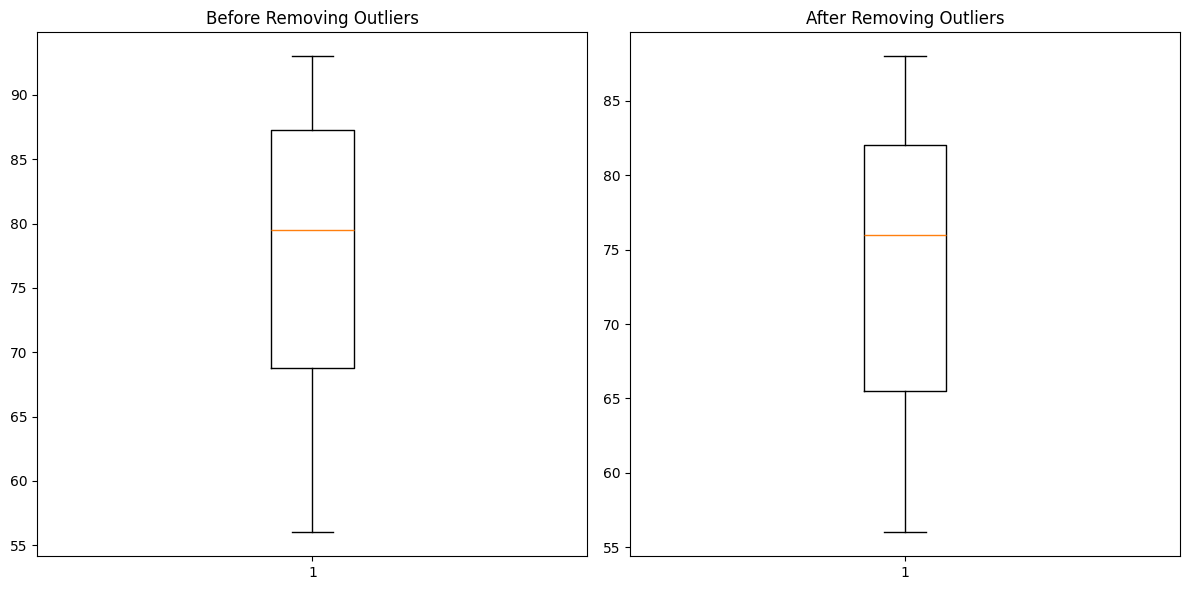

In [19]:
# Step 1: Calculate Q1, Q3, and IQR
Q1 = np.percentile(Scores, 10)
Q3 = np.percentile(Scores, 30)
IQR = Q3 - Q1

# Step 2: Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove outliers
filtered = [x for x in Scores if lower_bound <= x <= upper_bound]

# Plotting before and after removing outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Before removing outliers
ax1.boxplot(Scores)
ax1.set_title("Before Removing Outliers")

# After removing outliers
ax2.boxplot(filtered)
ax2.set_title("After Removing Outliers")

plt.tight_layout()
plt.show()

## Z-Score

<BarContainer object of 24 artists>

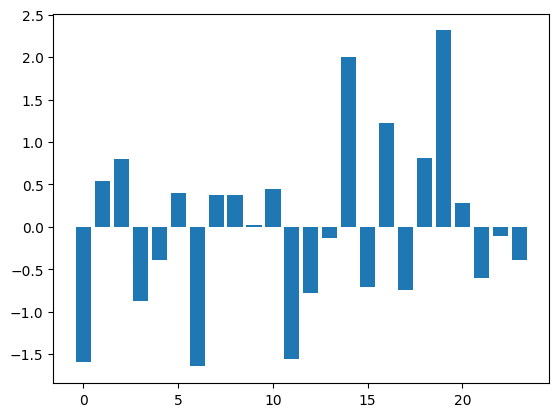

In [7]:
z_scores = []
m = np.mean(friends) # average friends on Facebook
s = np.std(friends) # standard deviation friends on Facebook
for friend in friends:
    z = (friend - m)/s # z-score
    z_scores.append(z) # make a list of the scores for plotting

plt.bar(y_pos, z_scores)

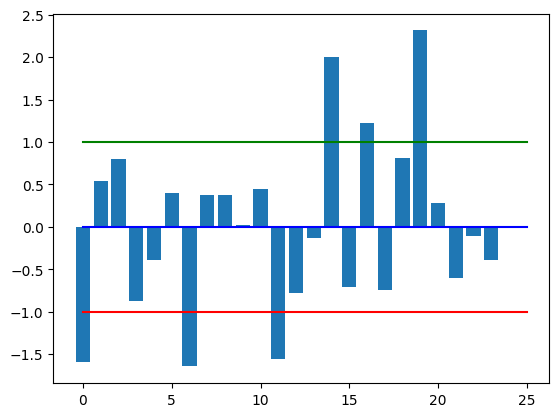

In [8]:
plt.bar(y_pos, z_scores)
plt.plot((0, 25), (1, 1), 'g-') # zero standard deviations away from the mean
plt.plot((0, 25), (0, 0), 'b-') # represents one standard deviation above the mean
plt.plot((0, 25), (-1, -1), 'r-') # one standard deviation below the mean

<Axes: xlabel='friends_scaled', ylabel='happiness_scaled'>

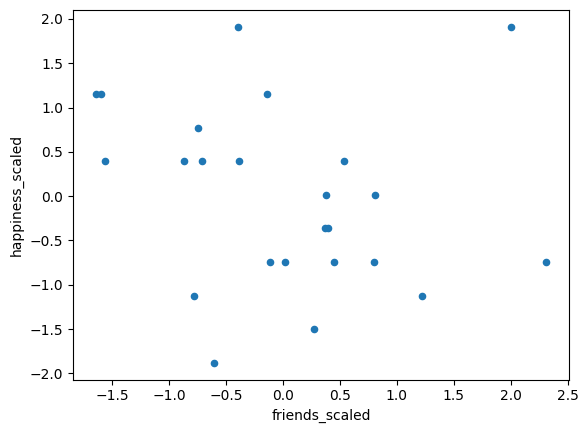

In [16]:
import pandas as pd
from sklearn import preprocessing

happiness = [.8, .6, .3, .6, .6, .4, .8, .5, .4, .3, .3, .6, .2, .8,
1, .6, .2, .7, .5, .3, .1, 0, .3, 1]

df = pd.DataFrame({'friends':friends, 'happiness':happiness})
df.head()

## Steps for z score
# Finding the mean of the column
# Finding the standard deviation of the column
# Applying the z-score function to each element in the column
df_scaled = pd.DataFrame(preprocessing.scale(df), columns = ['friends_scaled', 'happiness_scaled'])
df_scaled.head()

df_scaled.plot(kind='scatter', x = 'friends_scaled', y = 'happiness_scaled')

## Emperical Rule

In [17]:
# finding the percentage of people within one standard deviation ofthe mean
within_1_std = df_scaled[(df_scaled['friends_scaled'] <= 1) & (df_scaled['friends_scaled'] >= -1)].shape[0]
print("within 1 std",within_1_std / float(df_scaled.shape[0]))
# 0.75
# finding the percentage of people within two standard deviations of the mean
within_2_std = df_scaled[(df_scaled['friends_scaled'] <= 2) & (df_scaled['friends_scaled'] >= -2)].shape[0]
print("within 2 std",within_2_std / float(df_scaled.shape[0]))
# 0.916
# finding the percentage of people within three standard deviations of the mean
within_3_std = df_scaled[(df_scaled['friends_scaled'] <= 3) & (df_scaled['friends_scaled'] >= -3)].shape[0]
print("within 3std",within_3_std / float(df_scaled.shape[0]))
# 1.0

within 1 std 0.75
within 2 std 0.9166666666666666
within 3std 1.0
